In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [264]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode,quote
import urllib.request
import json

In [265]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [266]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [267]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 백신 데이터 정리

In [350]:
seoul_vc = pd.read_csv('data/vc_seoul.csv').iloc[:112,3:]
busan_vc = pd.read_csv('data/vc_busan.csv').iloc[:112,3:]
daegu_vc = pd.read_csv('data/vc_daegu.csv').iloc[:112,3:]

In [351]:
#날짜변경
date_lis = []
for date in seoul_vc['baseDate']:
    date_lis.append(int(date[:10].replace("-","")))

    
seoul_vc['baseDate'] = date_lis
busan_vc['baseDate'] = date_lis
daegu_vc['baseDate'] = date_lis

In [352]:
# 지역별 주간 누적 (영화 기준 인덱스 수정)
## 서울
tmp_s = seoul_vc[
         (seoul_vc['baseDate']==20210312) | 
         (seoul_vc['baseDate']==20210319) |
         (seoul_vc['baseDate']==20210326) |
         (seoul_vc['baseDate']==20210402) | 
         (seoul_vc['baseDate']==20210409) |
         (seoul_vc['baseDate']==20210416) | 
         (seoul_vc['baseDate']==20210423) |
         (seoul_vc['baseDate']==20210430) |
         (seoul_vc['baseDate']==20210507) | 
         (seoul_vc['baseDate']==20210514) |
         (seoul_vc['baseDate']==20210521) |
         (seoul_vc['baseDate']==20210528) |
         (seoul_vc['baseDate']==20210604) |
         (seoul_vc['baseDate']==20210611) | 
         (seoul_vc['baseDate']==20210618) |
         (seoul_vc['baseDate']==20210625) 
        ]

## 부산
tmp_b = busan_vc[
         (busan_vc['baseDate']==20210312) | 
         (busan_vc['baseDate']==20210319) |
         (busan_vc['baseDate']==20210326) |
         (busan_vc['baseDate']==20210402) | 
         (busan_vc['baseDate']==20210409) |
         (busan_vc['baseDate']==20210416) | 
         (busan_vc['baseDate']==20210423) |
         (busan_vc['baseDate']==20210430) |
         (busan_vc['baseDate']==20210507) | 
         (busan_vc['baseDate']==20210514) |
         (busan_vc['baseDate']==20210521) |
         (busan_vc['baseDate']==20210528) |
         (busan_vc['baseDate']==20210604) |
         (busan_vc['baseDate']==20210611) | 
         (busan_vc['baseDate']==20210618) |
         (busan_vc['baseDate']==20210625)  
        ]


In [353]:
## 불필요한 열 제거
tmp_s = tmp_s.reset_index(drop=True)
tmp_b = tmp_b.reset_index(drop=True)

In [354]:
#주간 접종자 수 계산
s_week_1 = [0]
b_week_1 = [0]
s_week_2 = [0]
b_week_2 = [0]

for i in range(16):
    try:
        s_week_2.append(tmp_s['totalSecondCnt'][i+1]-tmp_s['totalSecondCnt'][i])
        b_week_2.append(tmp_b['totalSecondCnt'][i+1]-tmp_b['totalSecondCnt'][i])
        
        s_week_1.append(tmp_s['totalFirstCnt'][i+1]-tmp_s['totalFirstCnt'][i])
        b_week_1.append(tmp_b['totalFirstCnt'][i+1]-tmp_b['totalFirstCnt'][i])
        
    except:
        pass

In [355]:

#지역별 주간 누적 dict: 날짜,1차누계,2차
dict_seoul_vaccine = {"일자":tmp_s['baseDate'].astype(str).values,
             "1차접종누계":tmp_s['totalFirstCnt'].values,
             "2차접종누계":tmp_s['totalSecondCnt'].values,
             "주간1차접종자수": np.array(s_week_1),
             "주간2차접종자수": np.array(s_week_2)
            }

dict_busan_vaccine = {"일자":tmp_b['baseDate'].astype(str).values,
             "1차접종누계":tmp_b['totalFirstCnt'].values,
             "2차접종누계":tmp_b['totalSecondCnt'].values,
             "주간1차접종자수": np.array(b_week_1),
             "주간2차접종자수": np.array(b_week_2)
               }

In [356]:
dict_seoul_vaccine
dict_busan_vaccine

{'일자': array(['20210312', '20210319', '20210326', '20210402', '20210409',
        '20210416', '20210423', '20210430', '20210507', '20210514',
        '20210521', '20210528', '20210604', '20210611', '20210618',
        '20210625'], dtype=object),
 '1차접종누계': array([  85864,  112949,  127379,  146106,  171379,  208744,  317386,
         472376,  574583,  604185,  619017,  772541, 1232478, 1900981,
        2637993, 2811191], dtype=int64),
 '2차접종누계': array([     0,      0,   2171,   9182,  13153,  13502,  15901,  31620,
         59707, 125220, 198625, 304336, 355399, 448684, 711572, 835878],
       dtype=int64),
 '주간1차접종자수': array([     0,  27085,  14430,  18727,  25273,  37365, 108642, 154990,
        102207,  29602,  14832, 153524, 459937, 668503, 737012, 173198],
       dtype=int64),
 '주간2차접종자수': array([     0,      0,   2171,   7011,   3971,    349,   2399,  15719,
         28087,  65513,  73405, 105711,  51063,  93285, 262888, 124306],
       dtype=int64)}

{'일자': array(['20210312', '20210319', '20210326', '20210402', '20210409',
        '20210416', '20210423', '20210430', '20210507', '20210514',
        '20210521', '20210528', '20210604', '20210611', '20210618',
        '20210625'], dtype=object),
 '1차접종누계': array([  42779,   52366,   64072,   76038,   85933,   99596,  127266,
         192612,  226761,  231702,  233978,  306084,  500110,  768384,
        1025118, 1092941], dtype=int64),
 '2차접종누계': array([     0,      0,    110,    245,   3317,   4161,   4960,  10330,
         20948,  34770,  77955, 121786, 133563, 159456, 241669, 294736],
       dtype=int64),
 '주간1차접종자수': array([     0,   9587,  11706,  11966,   9895,  13663,  27670,  65346,
         34149,   4941,   2276,  72106, 194026, 268274, 256734,  67823],
       dtype=int64),
 '주간2차접종자수': array([    0,     0,   110,   135,  3072,   844,   799,  5370, 10618,
        13822, 43185, 43831, 11777, 25893, 82213, 53067], dtype=int64)}

In [357]:
seoul_vaccine = pd.DataFrame(dict_seoul_vaccine)
busan_vaccine = pd.DataFrame(dict_busan_vaccine)

In [358]:
seoul_vaccine.head()
busan_vaccine.head()

,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,20210312,85864,0,0,0
1,20210319,112949,0,27085,0
2,20210326,127379,2171,14430,2171
3,20210402,146106,9182,18727,7011
4,20210409,171379,13153,25273,3971


,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,20210312,42779,0,0,0
1,20210319,52366,0,9587,0
2,20210326,64072,110,11706,110
3,20210402,76038,245,11966,135
4,20210409,85933,3317,9895,3072


## 영화관 자료 정리

In [277]:
seuoul_test_data_2020 = pd.read_csv("./data/seoul_movie_2020.csv", thousands=',', encoding='UTF-8')
busan_test_data_2020 = pd.read_csv("./data/busan_movie_2020.csv", thousands=',', encoding='UTF-8')
avg_movie = pd.read_csv("./data/2019_평균자료_영화.csv", thousands=',', encoding='UTF-8')

In [278]:
seuoul_test_data_2020.head()
busan_test_data_2020.head()
avg_movie.head()

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,3361656490,368804,2020-08-16
1,5,서울시,2189550260,247399,2020-08-23
2,5,서울시,1842116650,200100,2020-08-30
3,5,서울시,1733144880,188395,2020-09-06
4,5,서울시,1571785690,172993,2020-09-13


,Unnamed: 0,지역,매출액,관객수,주
0,7,부산시,1114537230,123943,2020-08-16
1,7,부산시,618924290,71890,2020-08-23
2,7,부산시,467448880,53630,2020-08-30
3,7,부산시,401747560,45878,2020-09-06
4,7,부산시,350543860,40374,2020-09-13


,Unnamed: 0,상영편수,매출액,관객수
0,서울,62.076923,9.735130e+09,1.111436e+06
1,부산,27.519231,2.929068e+09,3.491882e+05


In [279]:
seuoul_test_data_2021_bv = pd.read_csv("./data/2021_~02서울.csv", thousands=',', encoding='UTF-8')
seuoul_test_data_2021_av = pd.read_csv("./data/2021_03~06서울.csv", thousands=',', encoding='UTF-8')
busan_test_data_2021_bv = pd.read_csv("./data/2021_~02부산.csv", thousands=',', encoding='UTF-8')
busan_test_data_2021_av = pd.read_csv("./data/2021_03~06부산.csv", thousands=',', encoding='UTF-8')

In [280]:
seuoul_test_data_2021_bv.head()
seuoul_test_data_2021_av.head()

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,625176800,71052,2021-01-01
1,5,서울시,446257140,50249,2021-01-08
2,5,서울시,761371720,85940,2021-01-15
3,5,서울시,2050589220,230553,2021-01-22
4,5,서울시,2287327000,246303,2021-01-29


,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,2370034110,245237,2021-03-12
1,5,서울시,2370034110,245237,2021-03-12
2,5,서울시,2089378170,221908,2021-03-19
3,5,서울시,2156717370,223590,2021-03-26
4,5,서울시,2394668990,261118,2021-04-02


In [281]:
## 중복된 0312 데이터 삭제
seuoul_test_data_2021_av.drop([0], inplace=True)

In [282]:
movie_seoul_2021 = seuoul_test_data_2021_bv.sort_values(by=['주', '매출액'])

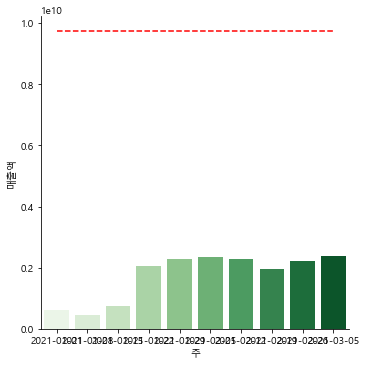

In [283]:
sns.catplot(data = movie_seoul_2021, x='주', y='매출액', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

In [284]:
movie_seoul_2021 = seuoul_test_data_2021_av.sort_values(by=['주', '매출액'])

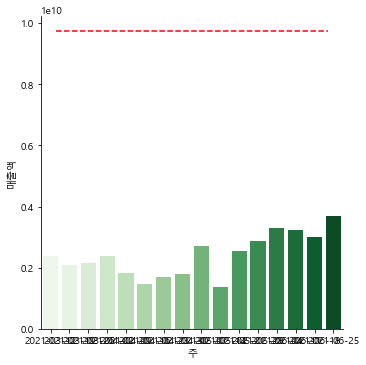

In [285]:
sns.catplot(data = movie_seoul_2021, x='주', y='매출액', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

## 서울시 시각화 파일 합치기

In [286]:
seuoul_test_data_2020
seuoul_test_data_2021_bv
seuoul_test_data_2021_av

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,3361656490,368804,2020-08-16
1,5,서울시,2189550260,247399,2020-08-23
2,5,서울시,1842116650,200100,2020-08-30
3,5,서울시,1733144880,188395,2020-09-06
4,5,서울시,1571785690,172993,2020-09-13
5,5,서울시,1686750342,194747,2020-09-20
6,6,서울시,4365204790,464557,2020-09-27
7,5,서울시,2310220710,243950,2020-10-04
8,5,서울시,1635498260,175172,2020-10-11
9,5,서울시,2051049940,235614,2020-10-18


,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,625176800,71052,2021-01-01
1,5,서울시,446257140,50249,2021-01-08
2,5,서울시,761371720,85940,2021-01-15
3,5,서울시,2050589220,230553,2021-01-22
4,5,서울시,2287327000,246303,2021-01-29
5,5,서울시,2358611200,247998,2021-02-05
6,5,서울시,2299673230,241331,2021-02-12
7,5,서울시,1955377880,215607,2021-02-19
8,5,서울시,2226500250,242385,2021-02-26
9,5,서울시,2370034110,245237,2021-03-05


,Unnamed: 0,지역,매출액,관객수,주
1,5,서울시,2370034110,245237,2021-03-12
2,5,서울시,2089378170,221908,2021-03-19
3,5,서울시,2156717370,223590,2021-03-26
4,5,서울시,2394668990,261118,2021-04-02
5,5,서울시,1826626560,193633,2021-04-09
6,5,서울시,1481982720,158687,2021-04-16
7,5,서울시,1709790330,183278,2021-04-23
8,5,서울시,1796128240,207101,2021-04-30
9,5,서울시,2713673630,290264,2021-05-07
10,5,서울시,1365881880,148365,2021-05-14


In [287]:
## 불필요한 열제거
seuoul_test_data_2020.drop('Unnamed: 0',axis=1, inplace=True)
seuoul_test_data_2021_bv.drop('Unnamed: 0',axis=1, inplace=True)
seuoul_test_data_2021_av.drop('Unnamed: 0',axis=1, inplace=True)

In [288]:
seuoul_test_data_2020.head()
seuoul_test_data_2021_bv.head()
seuoul_test_data_2021_av.head()

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13


,지역,매출액,관객수,주
0,서울시,625176800,71052,2021-01-01
1,서울시,446257140,50249,2021-01-08
2,서울시,761371720,85940,2021-01-15
3,서울시,2050589220,230553,2021-01-22
4,서울시,2287327000,246303,2021-01-29


,지역,매출액,관객수,주
1,서울시,2370034110,245237,2021-03-12
2,서울시,2089378170,221908,2021-03-19
3,서울시,2156717370,223590,2021-03-26
4,서울시,2394668990,261118,2021-04-02
5,서울시,1826626560,193633,2021-04-09


In [289]:
tot_seoul_data = pd.concat([seuoul_test_data_2020, seuoul_test_data_2021_bv, seuoul_test_data_2021_av])

## 인덱스 리셋 시켜서 그래프 그리기

In [383]:
seuoul_test_data_2021_av.reset_index(drop=True, inplace=True)

In [359]:
## seoul_vaccine에 주 컬럼 추가

seoul_vaccine['주'] = seuoul_test_data_2021_av['주']

In [360]:
test =pd.DataFrame()

In [361]:
test['주'] = tot_seoul_data['주']

In [362]:
test.reset_index(drop=True, inplace=True)

In [363]:
seoul_vaccine

,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수,주
0,20210312,85864,0,0,0,2021-03-12
1,20210319,112949,0,27085,0,2021-03-19
2,20210326,127379,2171,14430,2171,2021-03-26
3,20210402,146106,9182,18727,7011,2021-04-02
4,20210409,171379,13153,25273,3971,2021-04-09
5,20210416,208744,13502,37365,349,2021-04-16
6,20210423,317386,15901,108642,2399,2021-04-23
7,20210430,472376,31620,154990,15719,2021-04-30
8,20210507,574583,59707,102207,28087,2021-05-07
9,20210514,604185,125220,29602,65513,2021-05-14


In [364]:
seoul_vaccine.drop(['일자', '주간1차접종자수','주간2차접종자수'],axis=1, inplace=True)

In [371]:
seoul_vaccine=seoul_vaccine[['1차접종누계','2차접종누계','주']]

In [391]:
tot_seoul_data.reset_index(drop=True, inplace=True)

In [392]:
tot_seoul_data

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13
5,서울시,1686750342,194747,2020-09-20
6,서울시,4365204790,464557,2020-09-27
7,서울시,2310220710,243950,2020-10-04
8,서울시,1635498260,175172,2020-10-11
9,서울시,2051049940,235614,2020-10-18


In [404]:
final_data = pd.merge(tot_seoul_data, seoul_vaccine, how='left')

In [432]:
## NaN 값 처리
final_data = final_data.fillna(0)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

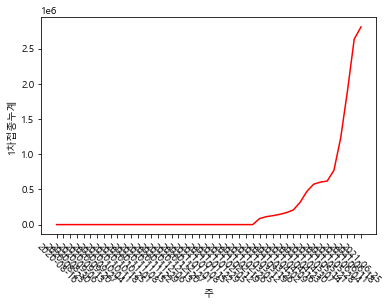

In [437]:
fig = sns.lineplot(data = final_data, x='주', y='1차접종누계', color ='red')
#fig.fig.set_size_inches(15,10)
#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, '2020-08-16'),
  Text(1, 0, '2020-08-23'),
  Text(2, 0, '2020-08-30'),
  Text(3, 0, '2020-09-06'),
  Text(4, 0, '2020-09-13'),
  Text(5, 0, '2020-09-20'),
  Text(6, 0, '2020-09-27'),
  Text(7, 0, '2020-10-04'),
  Text(8, 0, '2020-10-11'),
  Text(9, 0, '2020-10-18'),
  Text(10, 0, '2020-10-25'),
  Text(11, 0, '2020-11-01'),
  Text(12, 0, '2020-11-08'),
  Text(13, 0, '2020-11-15'),
  Text(14, 0, '2020-11-22'),
  Text(15, 0, '2020-11-29'),
  Text(16, 0, '2020-12-06'),
  Text(17, 0, '2020-12-13'),
  Text(18, 0, '2020-12-20'),
  Text(19, 0, '2020-12-27'),
  Text(20, 0, '2021-01-01'),
  Text(21, 0, '2021-01-08'),
  Text(22, 0, '2021-01-15'),
  Text(23, 0, '2021-01-22'),
  Text(24, 0, '2021-01-29'),
  Text(25, 0, '2021-02-05'),
  Text(26, 0, '2021-02-12'),
  Text(27, 0, '20

<Figure size 1080x576 with 0 Axes>

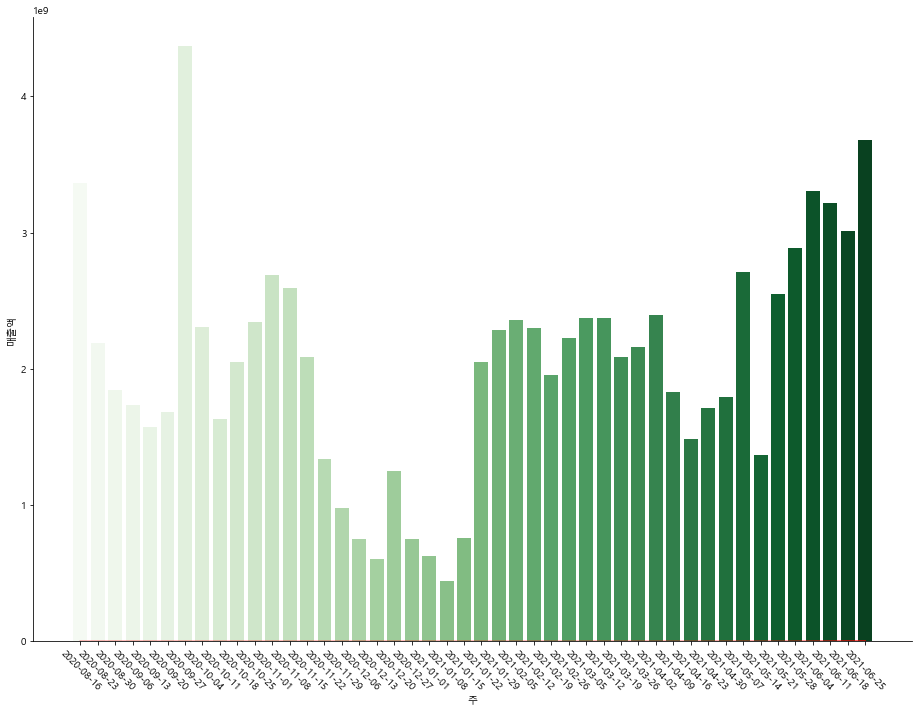

In [441]:
plt.gcf().set_size_inches(15, 8)

fig = sns.catplot(data = final_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')
fig2 = sns.lineplot(data = final_data, x='주', y='1차접종누계', color ='red')

fig.fig.set_size_inches(15,10)
#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, '2020-08-16'),
  Text(1, 0, '2020-08-23'),
  Text(2, 0, '2020-08-30'),
  Text(3, 0, '2020-09-06'),
  Text(4, 0, '2020-09-13'),
  Text(5, 0, '2020-09-20'),
  Text(6, 0, '2020-09-27'),
  Text(7, 0, '2020-10-04'),
  Text(8, 0, '2020-10-11'),
  Text(9, 0, '2020-10-18'),
  Text(10, 0, '2020-10-25'),
  Text(11, 0, '2020-11-01'),
  Text(12, 0, '2020-11-08'),
  Text(13, 0, '2020-11-15'),
  Text(14, 0, '2020-11-22'),
  Text(15, 0, '2020-11-29'),
  Text(16, 0, '2020-12-06'),
  Text(17, 0, '2020-12-13'),
  Text(18, 0, '2020-12-20'),
  Text(19, 0, '2020-12-27'),
  Text(20, 0, '2021-01-01'),
  Text(21, 0, '2021-01-08'),
  Text(22, 0, '2021-01-15'),
  Text(23, 0, '2021-01-22'),
  Text(24, 0, '2021-01-29'),
  Text(25, 0, '2021-02-05'),
  Text(26, 0, '2021-02-12'),
  Text(27, 0, '20

<Figure size 1080x576 with 0 Axes>

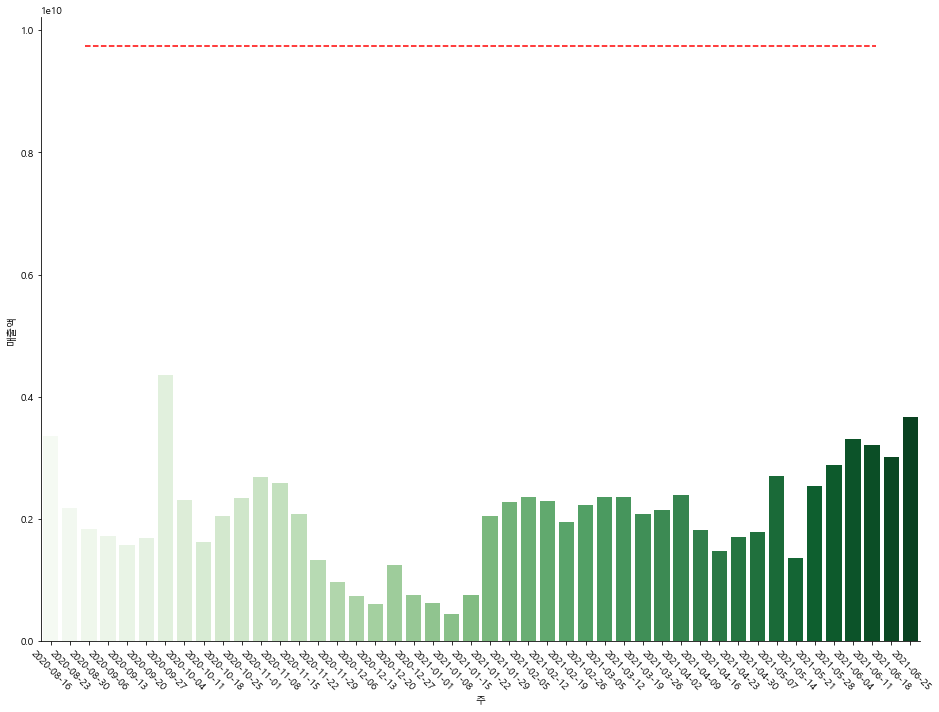

In [397]:
plt.gcf().set_size_inches(15, 8)

fig = sns.catplot(data = tot_seoul_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')

fig.fig.set_size_inches(15,10)
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)

In [250]:
seoul_vaccine.head()
tot_seoul_data.head()

,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수,주
0,20210312,85864,0,0,0,2021-03-12
1,20210319,112949,0,27085,0,2021-03-19
2,20210326,127379,2171,14430,2171,2021-03-26
3,20210402,146106,9182,18727,7011,2021-04-02
4,20210409,171379,13153,25273,3971,2021-04-09


,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')

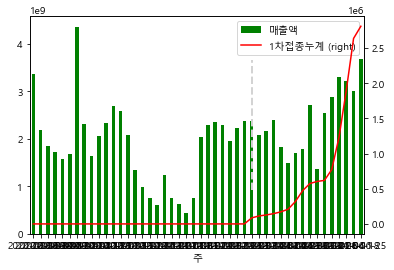

In [453]:

ax = final_data.plot(kind='bar', x='주', y='매출액', color='Green')
ax2 = final_data.plot(kind='line', y='1차접종누계', color='Red', secondary_y=True, ax=ax)
#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'blue', linestyle = '--' )
plt.xticks(rotation = - 45 )
plt.axvline(30, 0.2, 0.8, color='lightgray', linestyle='--', linewidth=2)
# yaxvline(x값, y축 시작, y축 끝, #(y축은 0 ~ 1 사이의 소수갑으로 표현)
#plt.vlines(20, 500, 1500, color='red', linestyle='solid', linewidth=3)

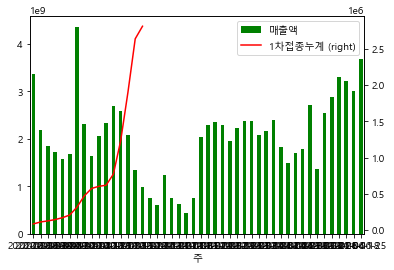

In [442]:

ax = tot_seoul_data.plot(kind='bar', x='주', y='매출액', color='Green')
ax2 = seoul_vaccine.plot(kind='line', y='1차접종누계', color='Red', secondary_y=True, ax=ax)

#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'blue', linestyle = '--' )
#plt.xticks(rotation = - 45 )

In [ ]:
seoul_vaccine

In [328]:
tot_seoul_data

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13
5,서울시,1686750342,194747,2020-09-20
6,서울시,4365204790,464557,2020-09-27
7,서울시,2310220710,243950,2020-10-04
8,서울시,1635498260,175172,2020-10-11
9,서울시,2051049940,235614,2020-10-18


In [301]:
seoul_vaccine

,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수,주
0,20210312,85864,0,0,0,2021-03-12
1,20210319,112949,0,27085,0,2021-03-19
2,20210326,127379,2171,14430,2171,2021-03-26
3,20210402,146106,9182,18727,7011,2021-04-02
4,20210409,171379,13153,25273,3971,2021-04-09
5,20210416,208744,13502,37365,349,2021-04-16
6,20210423,317386,15901,108642,2399,2021-04-23
7,20210430,472376,31620,154990,15719,2021-04-30
8,20210507,574583,59707,102207,28087,2021-05-07
9,20210514,604185,125220,29602,65513,2021-05-14


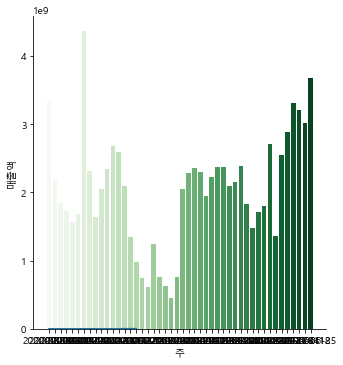

In [327]:


fig_movie = sns.catplot(data = tot_seoul_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')
fig_vacc = sns.lineplot(data = seoul_vaccine, x='주', y='1차접종누계')
# fig_movie.fig.set_size_inches(15,10)
# plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
# plt.xticks(rotation = - 45 )

TypeError: 'FacetGrid' object is not callable

<Figure size 1080x576 with 0 Axes>

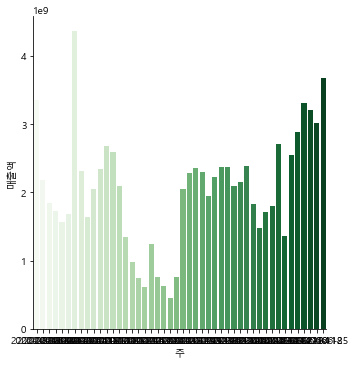

In [300]:
plt.gcf().set_size_inches(15, 8)
#fig, ax = plt.subplots(1,2,figsize = (10,5))
fig_movie = sns.catplot(data = tot_seoul_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')
fig_vacc = fig_movie(data = seoul_vaccine, x='주', y='매출액', kind = 'bar')

fig_movie.fig.set_size_inches(15,10)
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)

## 부산시 시각화 파일 합치기

In [120]:
## 중복된 0312 데이터 삭제
busan_test_data_2021_av.drop([0], inplace=True)

In [121]:
busan_test_data_2020.head()
busan_test_data_2021_bv.head()
busan_test_data_2021_av.head()

,Unnamed: 0,지역,매출액,관객수,주
0,7,부산시,1114537230,123943,2020-08-16
1,7,부산시,618924290,71890,2020-08-23
2,7,부산시,467448880,53630,2020-08-30
3,7,부산시,401747560,45878,2020-09-06
4,7,부산시,350543860,40374,2020-09-13


,Unnamed: 0,지역,매출액,관객수,주
0,7,부산시,133154520,15720,2021-01-01
1,7,부산시,90327570,10890,2021-01-08
2,7,부산시,139130900,16832,2021-01-15
3,7,부산시,381529810,45703,2021-01-22
4,7,부산시,467990770,52508,2021-01-29


,Unnamed: 0,지역,매출액,관객수,주
1,7,부산시,513370590,56521,2021-03-12
2,7,부산시,438756130,48866,2021-03-19
3,7,부산시,425217210,46215,2021-03-26
4,7,부산시,522446130,60290,2021-04-02
5,7,부산시,395182360,43284,2021-04-09


In [122]:
## 불필요한 열 제거
busan_test_data_2020.drop('Unnamed: 0',axis=1, inplace=True)
busan_test_data_2021_bv.drop('Unnamed: 0',axis=1, inplace=True)
busan_test_data_2021_av.drop('Unnamed: 0',axis=1, inplace=True)

In [123]:
busan_test_data_2020.head()
busan_test_data_2021_bv.head()
busan_test_data_2021_av.head()

,지역,매출액,관객수,주
0,부산시,1114537230,123943,2020-08-16
1,부산시,618924290,71890,2020-08-23
2,부산시,467448880,53630,2020-08-30
3,부산시,401747560,45878,2020-09-06
4,부산시,350543860,40374,2020-09-13


,지역,매출액,관객수,주
0,부산시,133154520,15720,2021-01-01
1,부산시,90327570,10890,2021-01-08
2,부산시,139130900,16832,2021-01-15
3,부산시,381529810,45703,2021-01-22
4,부산시,467990770,52508,2021-01-29


,지역,매출액,관객수,주
1,부산시,513370590,56521,2021-03-12
2,부산시,438756130,48866,2021-03-19
3,부산시,425217210,46215,2021-03-26
4,부산시,522446130,60290,2021-04-02
5,부산시,395182360,43284,2021-04-09


In [124]:
tot_busan_data = pd.concat([busan_test_data_2020, busan_test_data_2021_bv, busan_test_data_2021_av])

In [125]:
tot_busan_data.head()
tot_busan_data.tail()

,지역,매출액,관객수,주
0,부산시,1114537230,123943,2020-08-16
1,부산시,618924290,71890,2020-08-23
2,부산시,467448880,53630,2020-08-30
3,부산시,401747560,45878,2020-09-06
4,부산시,350543860,40374,2020-09-13


,지역,매출액,관객수,주
12,부산시,814105630,90495,2021-05-28
13,부산시,733089700,79243,2021-06-04
14,부산시,780069950,82722,2021-06-11
15,부산시,679511920,71450,2021-06-18
16,부산시,858280140,89771,2021-06-25


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, '2020-08-16'),
  Text(1, 0, '2020-08-23'),
  Text(2, 0, '2020-08-30'),
  Text(3, 0, '2020-09-06'),
  Text(4, 0, '2020-09-13'),
  Text(5, 0, '2020-09-20'),
  Text(6, 0, '2020-09-27'),
  Text(7, 0, '2020-10-04'),
  Text(8, 0, '2020-10-11'),
  Text(9, 0, '2020-10-18'),
  Text(10, 0, '2020-10-25'),
  Text(11, 0, '2020-11-01'),
  Text(12, 0, '2020-11-08'),
  Text(13, 0, '2020-11-15'),
  Text(14, 0, '2020-11-22'),
  Text(15, 0, '2020-11-29'),
  Text(16, 0, '2020-12-06'),
  Text(17, 0, '2020-12-13'),
  Text(18, 0, '2020-12-20'),
  Text(19, 0, '2020-12-27'),
  Text(20, 0, '2021-01-01'),
  Text(21, 0, '2021-01-08'),
  Text(22, 0, '2021-01-15'),
  Text(23, 0, '2021-01-22'),
  Text(24, 0, '2021-01-29'),
  Text(25, 0, '2021-02-05'),
  Text(26, 0, '2021-02-12'),
  Text(27, 0, '20

<Figure size 1080x576 with 0 Axes>

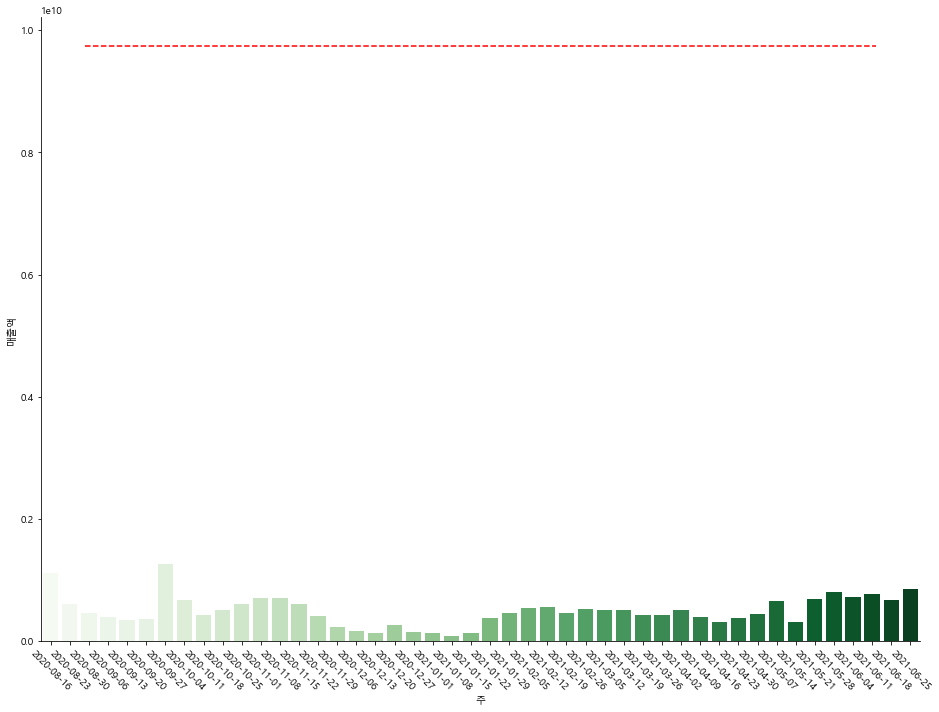

In [126]:
plt.gcf().set_size_inches(15, 8)

fig = sns.catplot(data = tot_busan_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')

fig.fig.set_size_inches(15,10)
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)